In [1]:
import numpy as np
import dill
import matplotlib.pyplot as plt
from math import radians, cos, sin, asin, sqrt
import seaborn

In [7]:
def openPickle(folder):
    with open(folder+'/Result_epps_expEPPS_p0_r0.pkl', 'rb') as f:
        file1 = dill.load(f)
    with open(folder+'/Result_epps_expEPPS_p0_r1.pkl', 'rb') as f:
        file2 = dill.load(f)
    with open(folder+'/Result_epps_expEPPS_p0_r2.pkl', 'rb') as f:
        file3 = dill.load(f)
    with open(folder+'/Result_epps_expEPPS_p0_r3.pkl', 'rb') as f:
        file4 = dill.load(f)
    with open(folder+'/Result_epps_expEPPS_p0_r4.pkl', 'rb') as f:
        file5 = dill.load(f)
    all_file = [file1, file2, file3, file4, file5]
    return all_file

def plot_all(dataset, init, final, title, plot=True):
    if plot == True:
        x = np.linspace(init, final, len(dataset[0]['Fidelity History'][init:]))
        plt.plot(x, dataset[0]['Fidelity History'][init:final+1], '-r')
        plt.plot(x, dataset[1]['Fidelity History'][init:final+1], '-g')
        plt.plot(x, dataset[2]['Fidelity History'][init:final+1], '-b')
        plt.plot(x, dataset[3]['Fidelity History'][init:final+1], '-c')
        plt.plot(x, dataset[4]['Fidelity History'][init:final+1], '-m')
        plt.xlabel('Direct fidelity estimation')
        plt.ylabel('Fidelity')
        plt.title(title)
        plt.show()

    avg_ssdp = []
    avg_ssdp.append(dataset[0]['Fidelity History'][init:final+1])
    avg_ssdp.append(dataset[1]['Fidelity History'][init:final+1])
    avg_ssdp.append(dataset[2]['Fidelity History'][init:final+1])
    avg_ssdp.append(dataset[3]['Fidelity History'][init:final+1])
    avg_ssdp.append(dataset[4]['Fidelity History'][init:final+1])
    avg_ssdp = np.array(avg_ssdp)

    mean_ssdp = avg_ssdp.mean(axis=0)
    std_ssdp = avg_ssdp.std(axis=0)
    print(title, "9000 DFE", round(mean_ssdp[-1], 3))
    print(title, "mean", mean_ssdp[-1])
    print(title, 'std', std_ssdp[-1])

    if plot == True:
        plt.xlabel('Direct fidelity estimation')
        plt.ylabel('Fidelity')
        plt.title(title)

        plt.plot(np.linspace(init, final+1, final+1-init), mean_ssdp, '-', color='cornflowerblue')
        plt.fill_between(np.linspace(init, final+1, final+1-init), mean_ssdp-std_ssdp, mean_ssdp+std_ssdp, alpha=0.3, color='cornflowerblue')
        plt.show()

    return round(mean_ssdp[-1], 3)

def distance(lat1, lat2, lon1, lon2):
     
    lon1 = radians(lon1)
    lon2 = radians(lon2)
    lat1 = radians(lat1)
    lat2 = radians(lat2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
 
    c = 2 * asin(sqrt(a))
    
    r = 6371

    return(c * r)

def earth_location(lat, lon):
    lat, lon = np.deg2rad(lat), np.deg2rad(lon)
    r_e = 6371
    x = r_e*np.cos(lat)*np.cos(lon)
    y = r_e*np.cos(lat)*np.sin(lon)
    z = r_e*np.sin(lat)
    return (x, y, z)

def place(choose):
    if choose == 'BKK':
        return earth_location(13.4553, 100.31316)
    elif choose == 'CM':
        return earth_location(18.804982, 98.954428)
    elif choose == 'SK':
        return earth_location(7.213724, 100.594990)
    elif choose == 'Keio':
        return earth_location(35.38563, 139.44346)

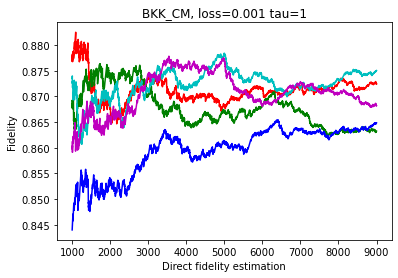

BKK_CM, loss=0.001 tau=1 9000 DFE 0.869
BKK_CM, loss=0.001 tau=1 mean 0.8687518017499556
BKK_CM, loss=0.001 tau=1 std 0.0044468783413339034


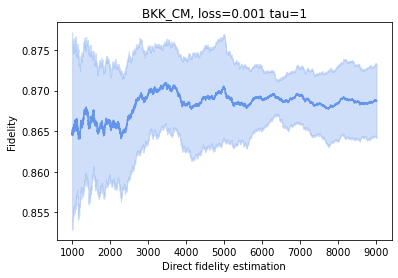

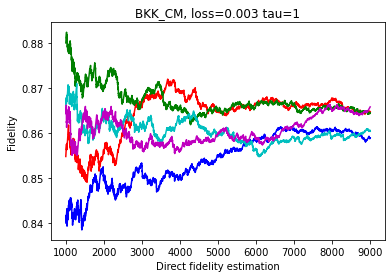

BKK_CM, loss=0.003 tau=1 9000 DFE 0.863
BKK_CM, loss=0.003 tau=1 mean 0.8629242020661213
BKK_CM, loss=0.003 tau=1 std 0.0027129223241640914


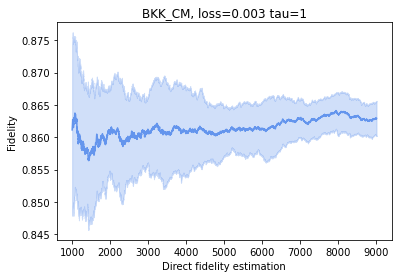

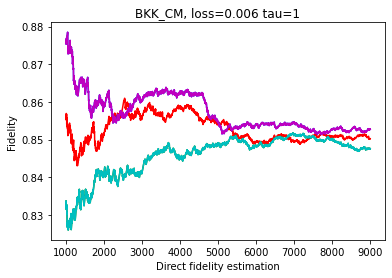

BKK_CM, loss=0.006 tau=1 9000 DFE 0.85
BKK_CM, loss=0.006 tau=1 mean 0.850150471007856
BKK_CM, loss=0.006 tau=1 std 0.0023190596793049864


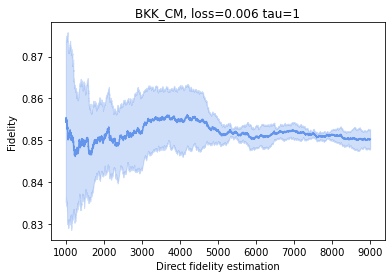

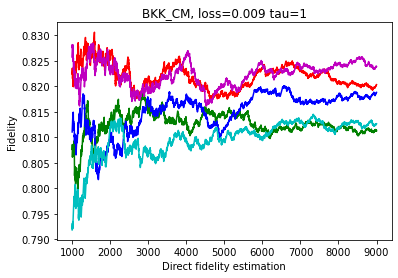

BKK_CM, loss=0.009 tau=1 9000 DFE 0.817
BKK_CM, loss=0.009 tau=1 mean 0.8173809930489686
BKK_CM, loss=0.009 tau=1 std 0.004739880879101555


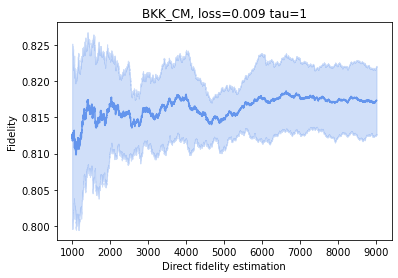

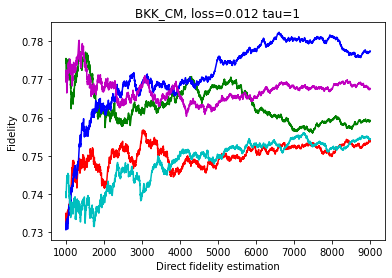

BKK_CM, loss=0.012 tau=1 9000 DFE 0.762
BKK_CM, loss=0.012 tau=1 mean 0.7624413271521246
BKK_CM, loss=0.012 tau=1 std 0.008976128727412188


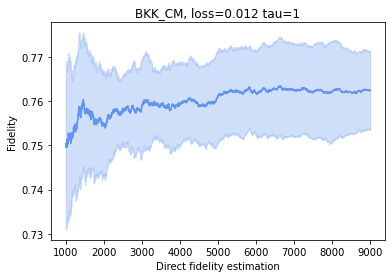

-------------------------------------------------------------------------------------------


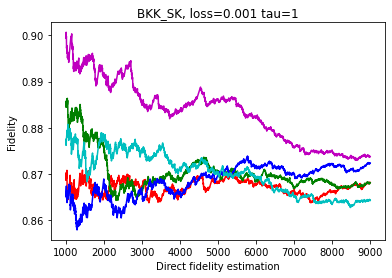

BKK_SK, loss=0.001 tau=1 9000 DFE 0.869
BKK_SK, loss=0.001 tau=1 mean 0.8693159563029889
BKK_SK, loss=0.001 tau=1 std 0.0033868265579891582


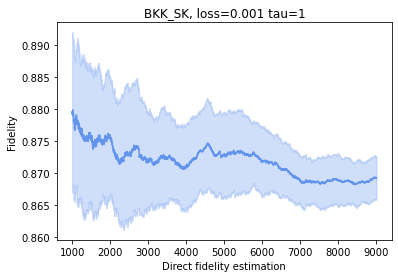

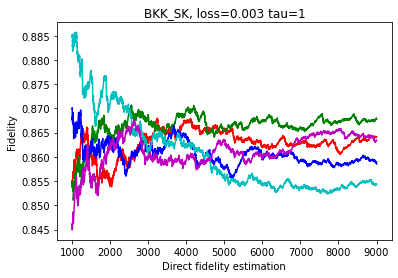

BKK_SK, loss=0.003 tau=1 9000 DFE 0.862
BKK_SK, loss=0.003 tau=1 mean 0.8616279451662102
BKK_SK, loss=0.003 tau=1 std 0.004677757612139312


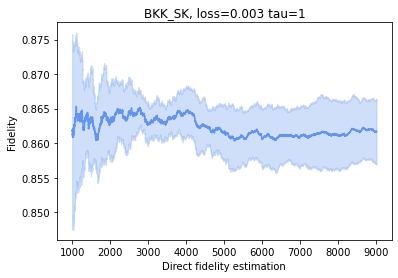

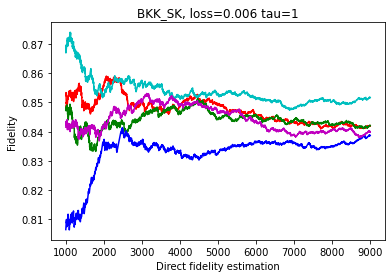

BKK_SK, loss=0.006 tau=1 9000 DFE 0.843
BKK_SK, loss=0.006 tau=1 mean 0.8428286941869484
BKK_SK, loss=0.006 tau=1 std 0.004587925815262771


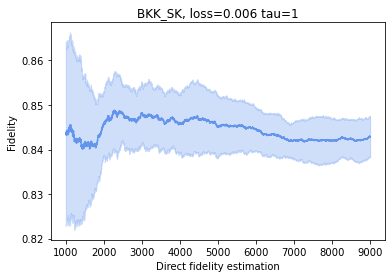

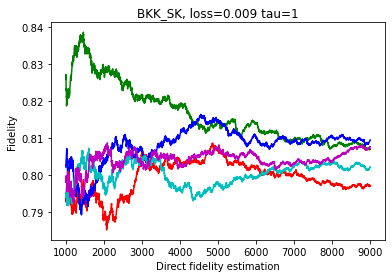

BKK_SK, loss=0.009 tau=1 9000 DFE 0.805
BKK_SK, loss=0.009 tau=1 mean 0.8046789528715491
BKK_SK, loss=0.009 tau=1 std 0.004510183846920134


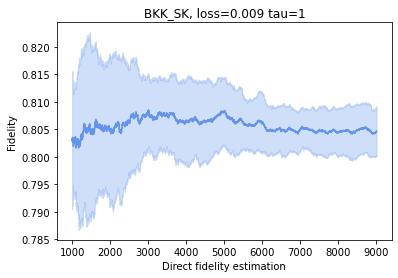

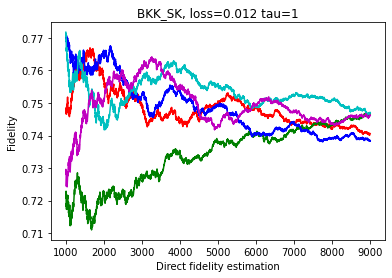

BKK_SK, loss=0.012 tau=1 9000 DFE 0.744
BKK_SK, loss=0.012 tau=1 mean 0.7437787782664194
BKK_SK, loss=0.012 tau=1 std 0.003630895490513283


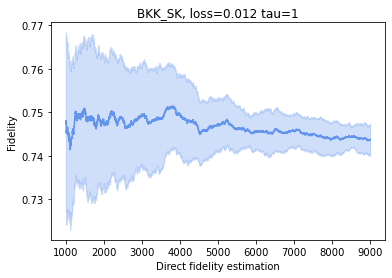

-------------------------------------------------------------------------------------------


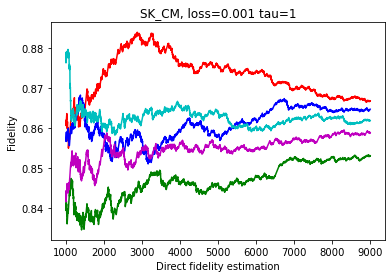

SK_CM, loss=0.001 tau=1 9000 DFE 0.861
SK_CM, loss=0.001 tau=1 mean 0.8610514018971017
SK_CM, loss=0.001 tau=1 std 0.004807831985372785


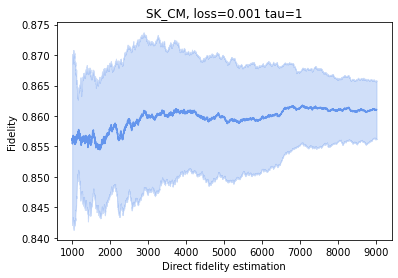

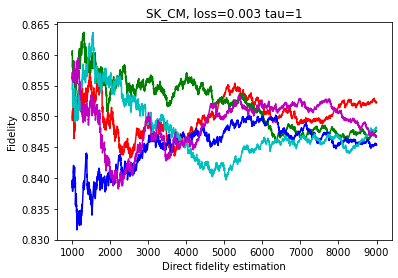

SK_CM, loss=0.003 tau=1 9000 DFE 0.848
SK_CM, loss=0.003 tau=1 mean 0.8480289797739164
SK_CM, loss=0.003 tau=1 std 0.0023124892938508074


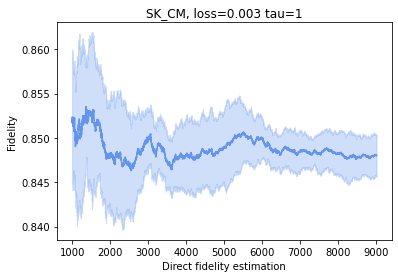

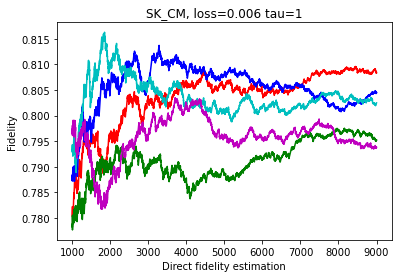

SK_CM, loss=0.006 tau=1 9000 DFE 0.801
SK_CM, loss=0.006 tau=1 mean 0.8008409402673744
SK_CM, loss=0.006 tau=1 std 0.0055445909041739695


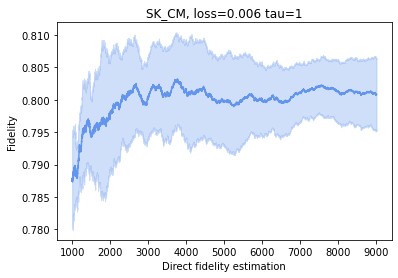

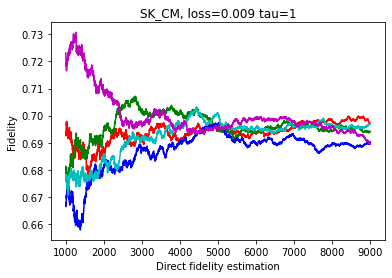

SK_CM, loss=0.009 tau=1 9000 DFE 0.694
SK_CM, loss=0.009 tau=1 mean 0.6935459092097084
SK_CM, loss=0.009 tau=1 std 0.0033015251367341405


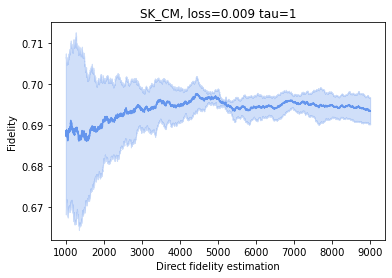

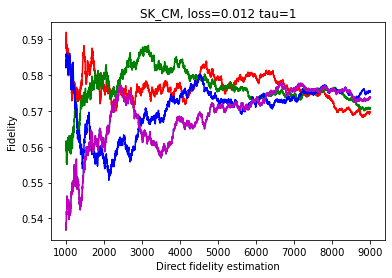

SK_CM, loss=0.012 tau=1 9000 DFE 0.573
SK_CM, loss=0.012 tau=1 mean 0.5727796317825542
SK_CM, loss=0.012 tau=1 std 0.0021384249141762545


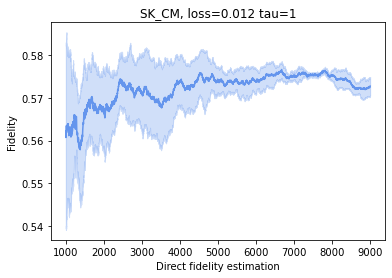

In [8]:
f_BKK_CM_1_tau1 = plot_all(openPickle('meaErr_0.03/tau1/BKK_CM_0.001_tau1_meaErr3'), 1000, 9000, 'BKK_CM, loss=0.001 tau=1')
f_BKK_CM_3_tau1 = plot_all(openPickle('meaErr_0.03/tau1/BKK_CM_0.003_tau1_meaErr3'), 1000, 9000, 'BKK_CM, loss=0.003 tau=1')
f_BKK_CM_6_tau1 = plot_all(openPickle('meaErr_0.03/tau1/BKK_CM_0.006_tau1_meaErr3'), 1000, 9000, 'BKK_CM, loss=0.006 tau=1') ###
f_BKK_CM_9_tau1 = plot_all(openPickle('meaErr_0.03/tau1/BKK_CM_0.009_tau1_meaErr3'), 1000, 9000, 'BKK_CM, loss=0.009 tau=1')
f_BKK_CM_12_tau1 = plot_all(openPickle('meaErr_0.03/tau1/BKK_CM_0.012_tau1_meaErr3'), 1000, 9000, 'BKK_CM, loss=0.012 tau=1')

print('-------------------------------------------------------------------------------------------')

f_BKK_SK_1_tau1 = plot_all(openPickle('meaErr_0.03/tau1/BKK_SK_0.001_tau1_meaErr3'), 1000, 9000, 'BKK_SK, loss=0.001 tau=1')
f_BKK_SK_3_tau1 = plot_all(openPickle('meaErr_0.03/tau1/BKK_SK_0.003_tau1_meaErr3'), 1000, 9000, 'BKK_SK, loss=0.003 tau=1')
f_BKK_SK_6_tau1 = plot_all(openPickle('meaErr_0.03/tau1/BKK_SK_0.006_tau1_meaErr3'), 1000, 9000, 'BKK_SK, loss=0.006 tau=1')
f_BKK_SK_9_tau1 = plot_all(openPickle('meaErr_0.03/tau1/BKK_SK_0.009_tau1_meaErr3'), 1000, 9000, 'BKK_SK, loss=0.009 tau=1')
f_BKK_SK_12_tau1 = plot_all(openPickle('meaErr_0.03/tau1/BKK_SK_0.012_tau1_meaErr3'), 1000, 9000, 'BKK_SK, loss=0.012 tau=1')

print('-------------------------------------------------------------------------------------------')

f_SK_CM_1_tau1 = plot_all(openPickle('meaErr_0.03/tau1/SK_CM_0.001_tau1_meaErr3'), 1000, 9000, 'SK_CM, loss=0.001 tau=1')
f_SK_CM_3_tau1 = plot_all(openPickle('meaErr_0.03/tau1/SK_CM_0.003_tau1_meaErr3'), 1000, 9000, 'SK_CM, loss=0.003 tau=1')
f_SK_CM_6_tau1 = plot_all(openPickle('meaErr_0.03/tau1/SK_CM_0.006_tau1_meaErr3'), 1000, 9000, 'SK_CM, loss=0.006 tau=1')
f_SK_CM_9_tau1 = plot_all(openPickle('meaErr_0.03/tau1/SK_CM_0.009_tau1_meaErr3'), 1000, 9000, 'SK_CM, loss=0.009 tau=1')
f_SK_CM_12_tau1 = plot_all(openPickle('meaErr_0.03/tau1/SK_CM_0.012_tau1_meaErr3'), 1000, 9000, 'SK_CM, loss=0.012 tau=1')

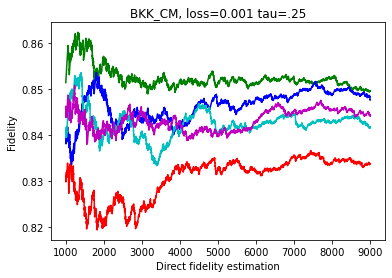

BKK_CM, loss=0.001 tau=.25 9000 DFE 0.843
BKK_CM, loss=0.001 tau=.25 mean 0.8433002615228166
BKK_CM, loss=0.001 tau=.25 std 0.005524767812949082


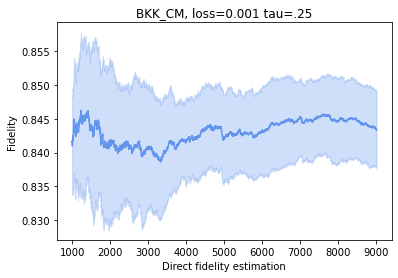

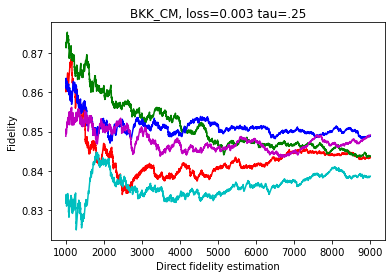

BKK_CM, loss=0.003 tau=.25 9000 DFE 0.845
BKK_CM, loss=0.003 tau=.25 mean 0.84474916625438
BKK_CM, loss=0.003 tau=.25 std 0.00390620657506023


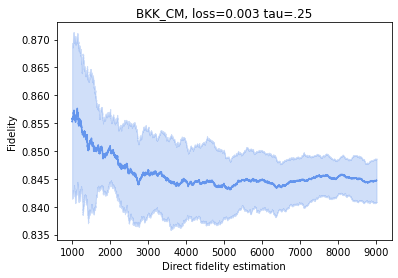

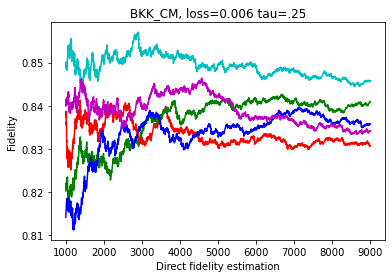

BKK_CM, loss=0.006 tau=.25 9000 DFE 0.837
BKK_CM, loss=0.006 tau=.25 mean 0.8374834903054988
BKK_CM, loss=0.006 tau=.25 std 0.005273592045992437


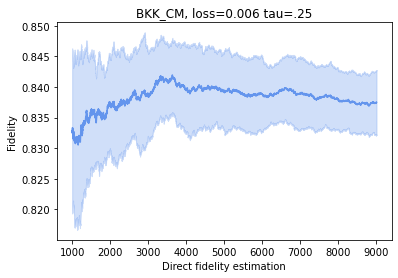

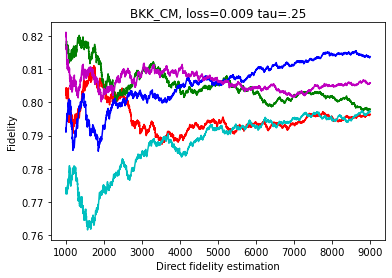

BKK_CM, loss=0.009 tau=.25 9000 DFE 0.802
BKK_CM, loss=0.009 tau=.25 mean 0.8022348044694361
BKK_CM, loss=0.009 tau=.25 std 0.006699545100561


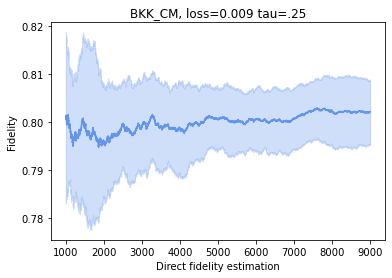

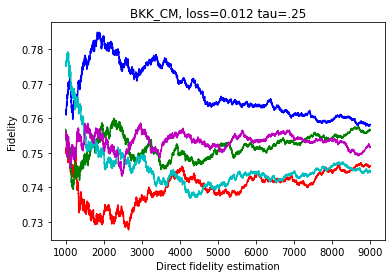

BKK_CM, loss=0.012 tau=.25 9000 DFE 0.751
BKK_CM, loss=0.012 tau=.25 mean 0.7514172557545471
BKK_CM, loss=0.012 tau=.25 std 0.005486853354554375


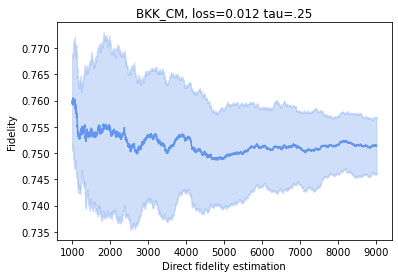

-------------------------------------------------------------------------------------------


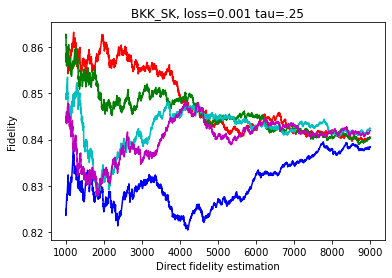

BKK_SK, loss=0.001 tau=.25 9000 DFE 0.841
BKK_SK, loss=0.001 tau=.25 mean 0.8407177385593932
BKK_SK, loss=0.001 tau=.25 std 0.0014249276954999843


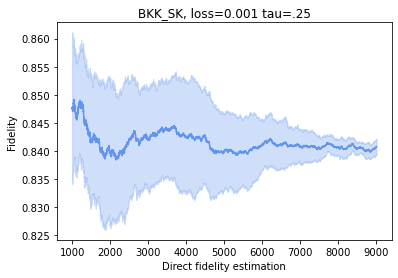

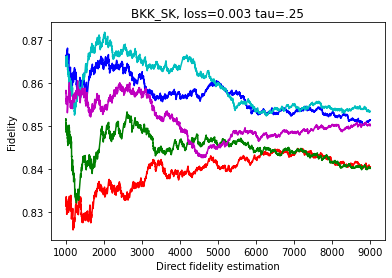

BKK_SK, loss=0.003 tau=.25 9000 DFE 0.847
BKK_SK, loss=0.003 tau=.25 mean 0.8470705591147887
BKK_SK, loss=0.003 tau=.25 std 0.0056432330683498


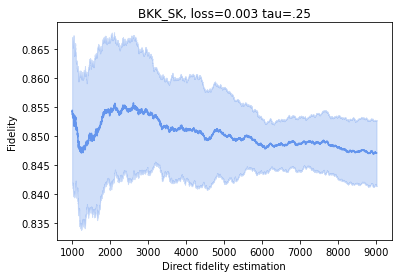

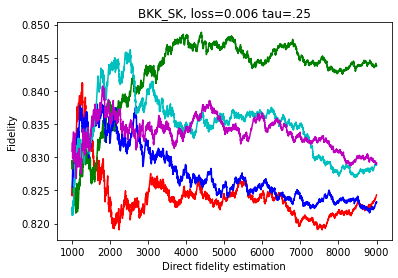

BKK_SK, loss=0.006 tau=.25 9000 DFE 0.83
BKK_SK, loss=0.006 tau=.25 mean 0.82986309103942
BKK_SK, loss=0.006 tau=.25 std 0.007348713353187433


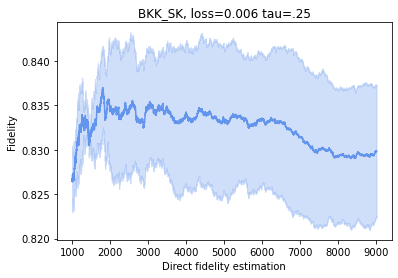

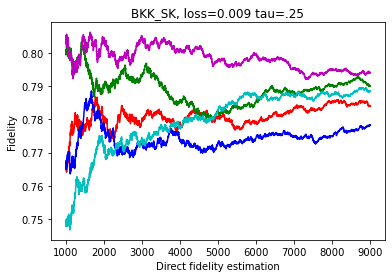

BKK_SK, loss=0.009 tau=.25 9000 DFE 0.787
BKK_SK, loss=0.009 tau=.25 mean 0.7870066614238409
BKK_SK, loss=0.009 tau=.25 std 0.005466377117842298


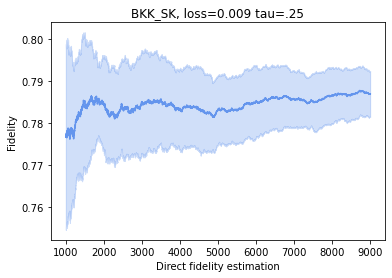

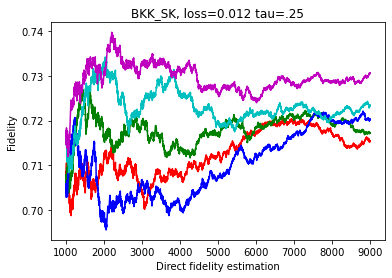

BKK_SK, loss=0.012 tau=.25 9000 DFE 0.721
BKK_SK, loss=0.012 tau=.25 mean 0.7214268645652636
BKK_SK, loss=0.012 tau=.25 std 0.005324783720791189


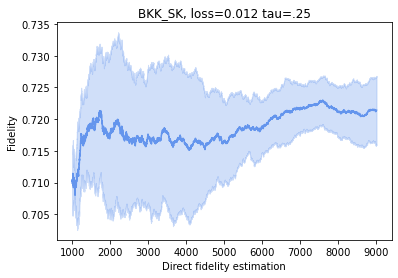

-------------------------------------------------------------------------------------------


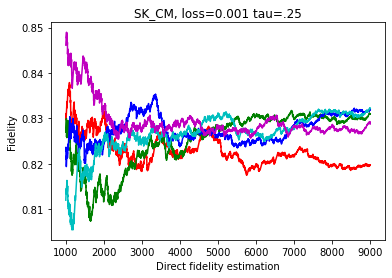

SK_CM, loss=0.001 tau=.25 9000 DFE 0.829
SK_CM, loss=0.001 tau=.25 mean 0.82872557543345
SK_CM, loss=0.001 tau=.25 std 0.004639382489711615


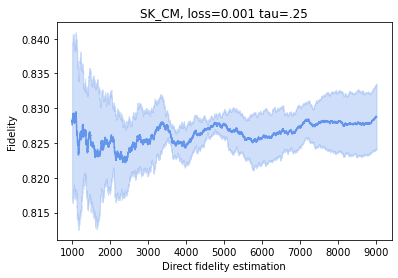

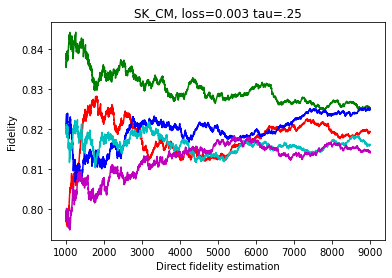

SK_CM, loss=0.003 tau=.25 9000 DFE 0.82
SK_CM, loss=0.003 tau=.25 mean 0.8199915647567714
SK_CM, loss=0.003 tau=.25 std 0.004506828198295653


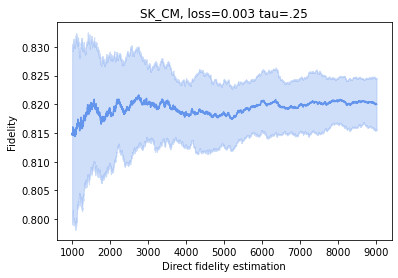

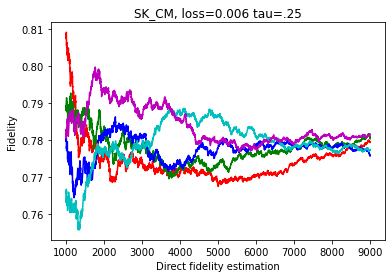

SK_CM, loss=0.006 tau=.25 9000 DFE 0.779
SK_CM, loss=0.006 tau=.25 mean 0.7788210798739776
SK_CM, loss=0.006 tau=.25 std 0.0020944863965778908


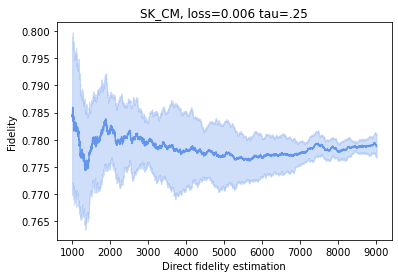

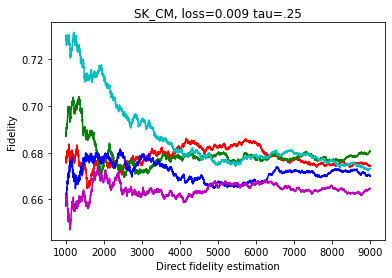

SK_CM, loss=0.009 tau=.25 9000 DFE 0.673
SK_CM, loss=0.009 tau=.25 mean 0.6725432087633159
SK_CM, loss=0.009 tau=.25 std 0.005211022972597863


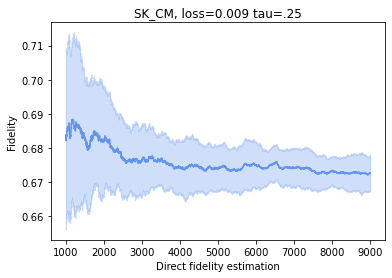

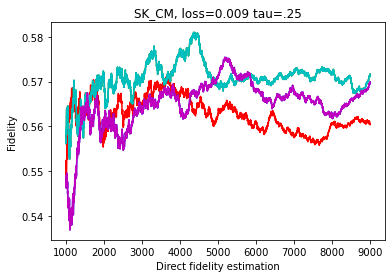

SK_CM, loss=0.009 tau=.25 9000 DFE 0.569
SK_CM, loss=0.009 tau=.25 mean 0.5687362472334041
SK_CM, loss=0.009 tau=.25 std 0.0041709454667281974


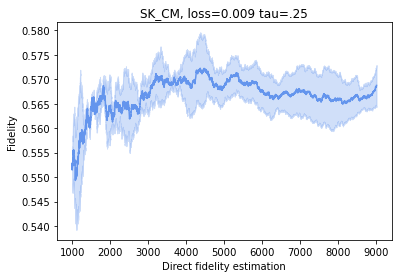

In [13]:
PG = True
f_BKK_CM_1_tau25 = plot_all(openPickle('meaErr_0.03/tau25/BKK_CM_0.001_tau0.25_meaErr3'), 1000, 9000, 'BKK_CM, loss=0.001 tau=.25', plot=PG)
f_BKK_CM_3_tau25 = plot_all(openPickle('meaErr_0.03/tau25/BKK_CM_0.003_tau0.25_meaErr3'), 1000, 9000, 'BKK_CM, loss=0.003 tau=.25', plot=PG)
f_BKK_CM_6_tau25 = plot_all(openPickle('meaErr_0.03/tau25/BKK_CM_0.006_tau0.25_meaErr3'), 1000, 9000, 'BKK_CM, loss=0.006 tau=.25', plot=PG)
f_BKK_CM_9_tau25 = plot_all(openPickle('meaErr_0.03/tau25/BKK_CM_0.009_tau0.25_meaErr3'), 1000, 9000, 'BKK_CM, loss=0.009 tau=.25', plot=PG)
f_BKK_CM_12_tau25 = plot_all(openPickle('meaErr_0.03/tau25/BKK_CM_0.012_tau0.25_meaErr3'), 1000, 9000, 'BKK_CM, loss=0.012 tau=.25', plot=PG)

print('-------------------------------------------------------------------------------------------')

f_BKK_SK_1_tau25 = plot_all(openPickle('meaErr_0.03/tau25/BKK_SK_0.001_tau0.25_meaErr3'), 1000, 9000, 'BKK_SK, loss=0.001 tau=.25', plot=PG)
f_BKK_SK_3_tau25 = plot_all(openPickle('meaErr_0.03/tau25/BKK_SK_0.003_tau0.25_meaErr3'), 1000, 9000, 'BKK_SK, loss=0.003 tau=.25', plot=PG)
f_BKK_SK_6_tau25 = plot_all(openPickle('meaErr_0.03/tau25/BKK_SK_0.006_tau0.25_meaErr3'), 1000, 9000, 'BKK_SK, loss=0.006 tau=.25', plot=PG)
f_BKK_SK_9_tau25 = plot_all(openPickle('meaErr_0.03/tau25/BKK_SK_0.009_tau0.25_meaErr3'), 1000, 9000, 'BKK_SK, loss=0.009 tau=.25', plot=PG)
f_BKK_SK_12_tau25 = plot_all(openPickle('meaErr_0.03/tau25/BKK_SK_0.012_tau0.25_meaErr3'), 1000, 9000, 'BKK_SK, loss=0.012 tau=.25', plot=PG)

print('-------------------------------------------------------------------------------------------')

f_SK_CM_1_tau25 = plot_all(openPickle('meaErr_0.03/tau25/SK_CM_0.001_tau0.25_meaErr3'), 1000, 9000, 'SK_CM, loss=0.001 tau=.25', plot=PG)
f_SK_CM_3_tau25 = plot_all(openPickle('meaErr_0.03/tau25/SK_CM_0.003_tau0.25_meaErr3'), 1000, 9000, 'SK_CM, loss=0.003 tau=.25', plot=PG)
f_SK_CM_6_tau25 = plot_all(openPickle('meaErr_0.03/tau25/SK_CM_0.006_tau0.25_meaErr3'), 1000, 9000, 'SK_CM, loss=0.006 tau=.25', plot=PG)
f_SK_CM_9_tau25 = plot_all(openPickle('meaErr_0.03/tau25/SK_CM_0.009_tau0.25_meaErr3'), 1000, 9000, 'SK_CM, loss=0.009 tau=.25', plot=PG)
f_SK_CM_12_tau25 = plot_all(openPickle('meaErr_0.03/tau25/SK_CM_0.012_tau0.25_meaErr3'), 1000, 9000, 'SK_CM, loss=0.009 tau=.25', plot=PG)

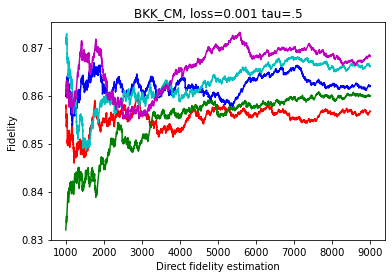

BKK_CM, loss=0.001 tau=.5 9000 DFE 0.863
BKK_CM, loss=0.001 tau=.5 mean 0.8625531949877278
BKK_CM, loss=0.001 tau=.5 std 0.004152541145894848


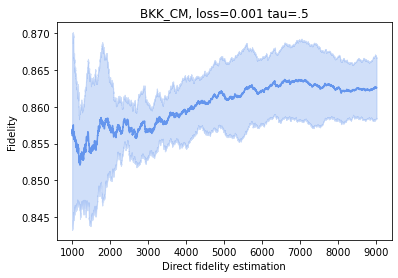

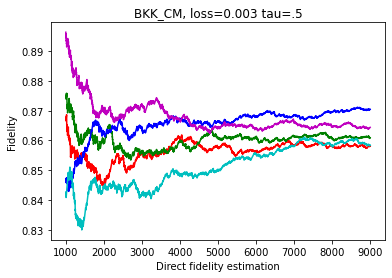

BKK_CM, loss=0.003 tau=.5 9000 DFE 0.862
BKK_CM, loss=0.003 tau=.5 mean 0.8624538063572948
BKK_CM, loss=0.003 tau=.5 std 0.004606312260369993


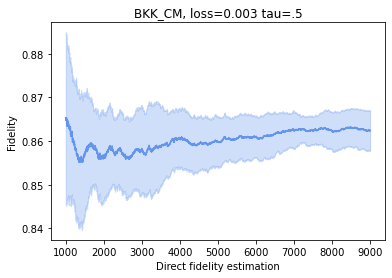

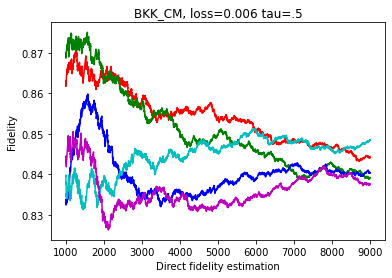

BKK_CM, loss=0.006 tau=.5 9000 DFE 0.842
BKK_CM, loss=0.006 tau=.5 mean 0.8418867635873941
BKK_CM, loss=0.006 tau=.5 std 0.003946632733072811


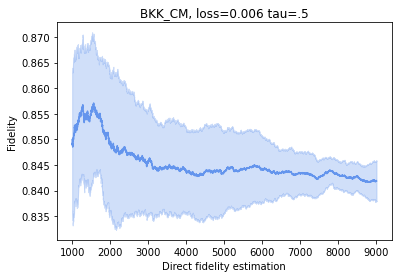

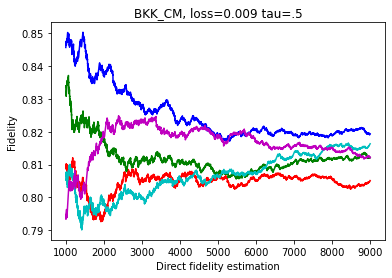

BKK_CM, loss=0.009 tau=.5 9000 DFE 0.813
BKK_CM, loss=0.009 tau=.5 mean 0.8130219875277988
BKK_CM, loss=0.009 tau=.5 std 0.004800126985399087


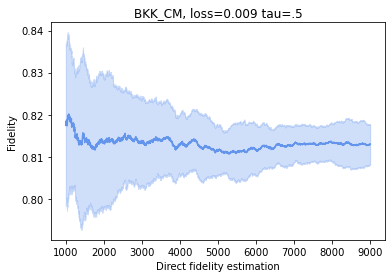

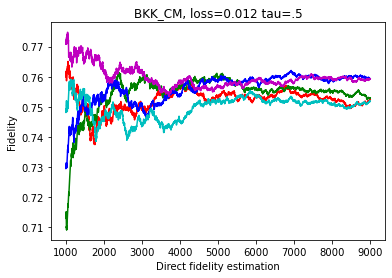

BKK_CM, loss=0.012 tau=.5 9000 DFE 0.755
BKK_CM, loss=0.012 tau=.5 mean 0.7551191780965798
BKK_CM, loss=0.012 tau=.5 std 0.003369886975028566


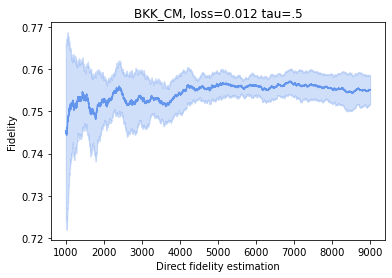

-------------------------------------------------------------------------------------------


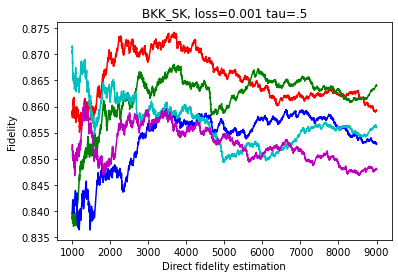

BKK_SK, loss=0.001 tau=.5 9000 DFE 0.856
BKK_SK, loss=0.001 tau=.5 mean 0.8559822016796026
BKK_SK, loss=0.001 tau=.5 std 0.005477970532877434


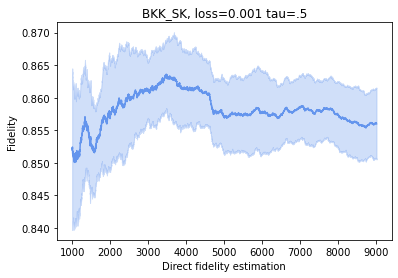

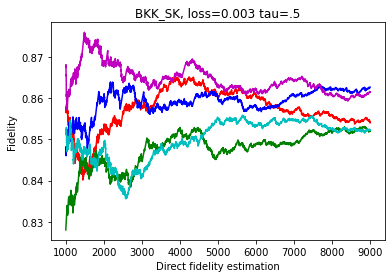

BKK_SK, loss=0.003 tau=.5 9000 DFE 0.856
BKK_SK, loss=0.003 tau=.5 mean 0.8564819006938335
BKK_SK, loss=0.003 tau=.5 std 0.004642134152137122


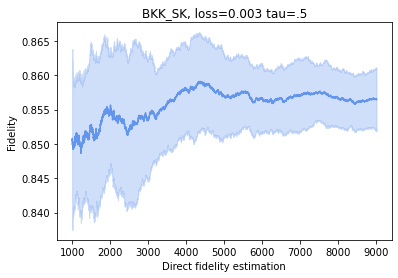

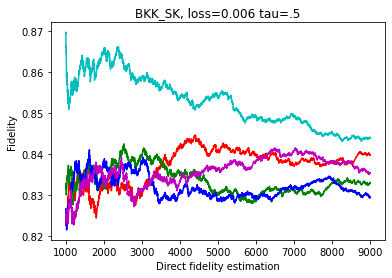

BKK_SK, loss=0.006 tau=.5 9000 DFE 0.836
BKK_SK, loss=0.006 tau=.5 mean 0.8363172452299018
BKK_SK, loss=0.006 tau=.5 std 0.005077549561021396


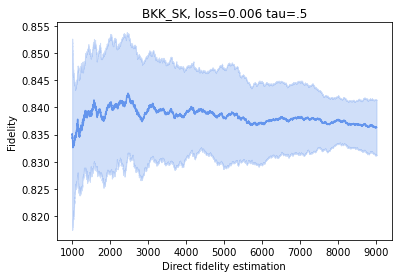

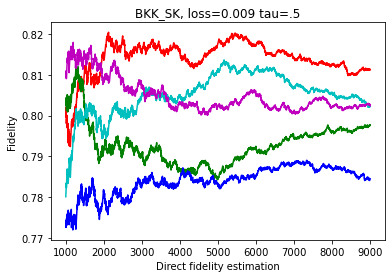

BKK_SK, loss=0.009 tau=.5 9000 DFE 0.8
BKK_SK, loss=0.009 tau=.5 mean 0.7996122285058229
BKK_SK, loss=0.009 tau=.5 std 0.008739851576884256


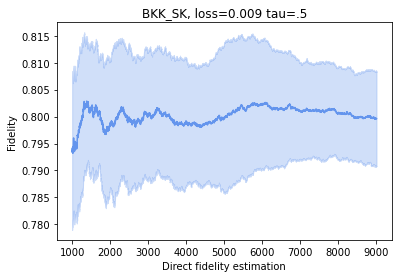

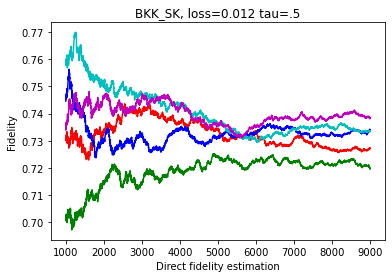

BKK_SK, loss=0.012 tau=.5 9000 DFE 0.731
BKK_SK, loss=0.012 tau=.5 mean 0.7305800232871139
BKK_SK, loss=0.012 tau=.5 std 0.0064797679360839655


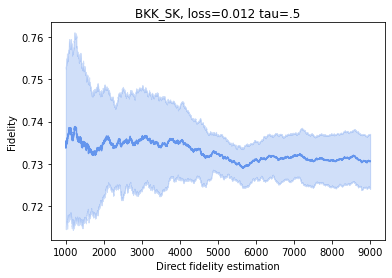

-------------------------------------------------------------------------------------------


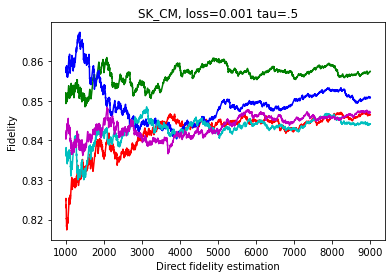

SK_CM, loss=0.001 tau=.5 9000 DFE 0.849
SK_CM, loss=0.001 tau=.5 mean 0.8491507108001624
SK_CM, loss=0.001 tau=.5 std 0.004639031165152478


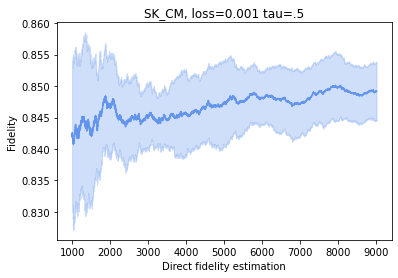

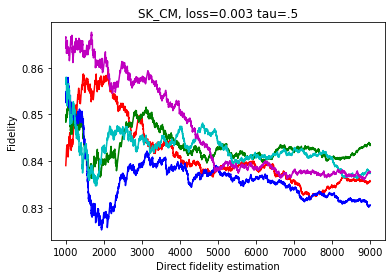

SK_CM, loss=0.003 tau=.5 9000 DFE 0.837
SK_CM, loss=0.003 tau=.5 mean 0.8369617298818064
SK_CM, loss=0.003 tau=.5 std 0.004091606405903198


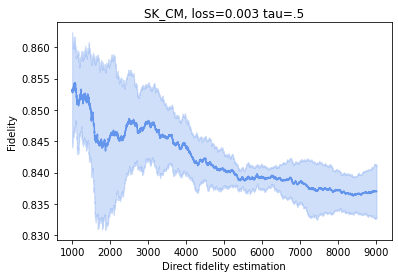

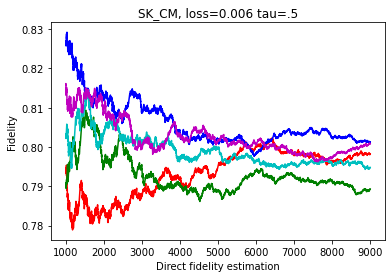

SK_CM, loss=0.006 tau=.5 9000 DFE 0.797
SK_CM, loss=0.006 tau=.5 mean 0.7968821416515961
SK_CM, loss=0.006 tau=.5 std 0.004446949815356207


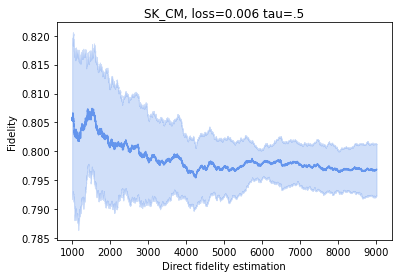

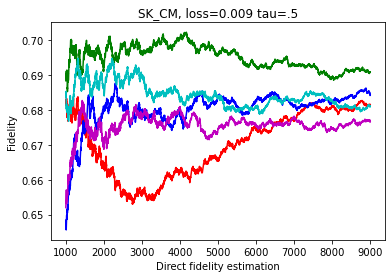

SK_CM, loss=0.009 tau=.5 9000 DFE 0.683
SK_CM, loss=0.009 tau=.5 mean 0.6828695192872696
SK_CM, loss=0.009 tau=.5 std 0.004697280294639396


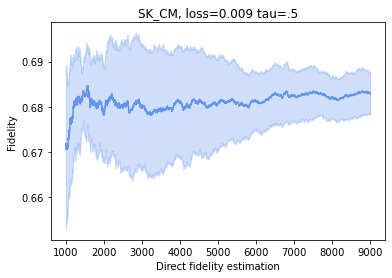

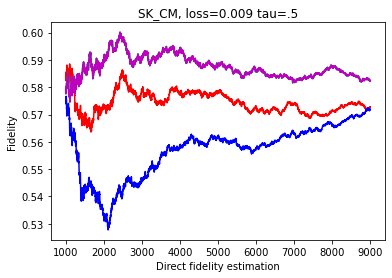

SK_CM, loss=0.009 tau=.5 9000 DFE 0.578
SK_CM, loss=0.009 tau=.5 mean 0.578402215628452
SK_CM, loss=0.009 tau=.5 std 0.004943538956932134


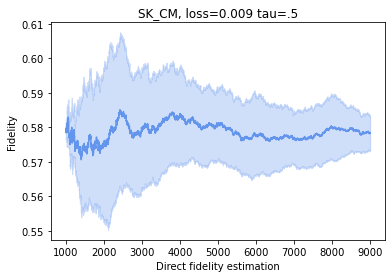

In [14]:
# tau0.5

f_BKK_CM_1_tau05 = plot_all(openPickle('meaErr_0.03/tau05/BKK_CM_0.001_tau0.5_meaErr3'), 1000, 9000, 'BKK_CM, loss=0.001 tau=.5')
f_BKK_CM_3_tau05 = plot_all(openPickle('meaErr_0.03/tau05/BKK_CM_0.003_tau0.5_meaErr3'), 1000, 9000, 'BKK_CM, loss=0.003 tau=.5')
f_BKK_CM_6_tau05 = plot_all(openPickle('meaErr_0.03/tau05/BKK_CM_0.006_tau0.5_meaErr3'), 1000, 9000, 'BKK_CM, loss=0.006 tau=.5')
f_BKK_CM_9_tau05 = plot_all(openPickle('meaErr_0.03/tau05/BKK_CM_0.009_tau0.5_meaErr3'), 1000, 9000, 'BKK_CM, loss=0.009 tau=.5')
f_BKK_CM_12_tau05 = plot_all(openPickle('meaErr_0.03/tau05/BKK_CM_0.012_tau0.5_meaErr3'), 1000, 9000, 'BKK_CM, loss=0.012 tau=.5')

print('-------------------------------------------------------------------------------------------')

f_BKK_SK_1_tau05 = plot_all(openPickle('meaErr_0.03/tau05/BKK_SK_0.001_tau0.5_meaErr3'), 1000, 9000, 'BKK_SK, loss=0.001 tau=.5')
f_BKK_SK_3_tau05 = plot_all(openPickle('meaErr_0.03/tau05/BKK_SK_0.003_tau0.5_meaErr3'), 1000, 9000, 'BKK_SK, loss=0.003 tau=.5')
f_BKK_SK_6_tau05 = plot_all(openPickle('meaErr_0.03/tau05/BKK_SK_0.006_tau0.5_meaErr3'), 1000, 9000, 'BKK_SK, loss=0.006 tau=.5')
f_BKK_SK_9_tau05 = plot_all(openPickle('meaErr_0.03/tau05/BKK_SK_0.009_tau0.5_meaErr3'), 1000, 9000, 'BKK_SK, loss=0.009 tau=.5')
f_BKK_SK_12_tau05 = plot_all(openPickle('meaErr_0.03/tau05/BKK_SK_0.012_tau0.5_meaErr3'), 1000, 9000, 'BKK_SK, loss=0.012 tau=.5')

print('-------------------------------------------------------------------------------------------')

f_SK_CM_1_tau05 = plot_all(openPickle('meaErr_0.03/tau05/SK_CM_0.001_tau0.5_meaErr3'), 1000, 9000, 'SK_CM, loss=0.001 tau=.5')
f_SK_CM_3_tau05 = plot_all(openPickle('meaErr_0.03/tau05/SK_CM_0.003_tau0.5_meaErr3'), 1000, 9000, 'SK_CM, loss=0.003 tau=.5')
f_SK_CM_6_tau05 = plot_all(openPickle('meaErr_0.03/tau05/SK_CM_0.006_tau0.5_meaErr3'), 1000, 9000, 'SK_CM, loss=0.006 tau=.5')
f_SK_CM_9_tau05 = plot_all(openPickle('meaErr_0.03/tau05/SK_CM_0.009_tau0.5_meaErr3'), 1000, 9000, 'SK_CM, loss=0.009 tau=.5')
f_SK_CM_12_tau05 = plot_all(openPickle('meaErr_0.03/tau05/SK_CM_0.012_tau0.5_meaErr3'), 1000, 9000, 'SK_CM, loss=0.009 tau=.5')

Text(57.5, 0.5, 'Loss ( dB / km )')

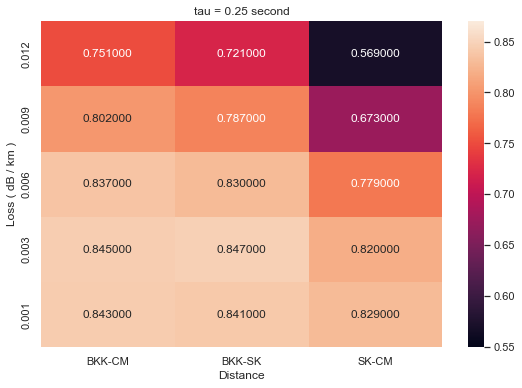

In [15]:
# tau=.25
heatmap = np.array([[f_BKK_CM_12_tau25, f_BKK_SK_12_tau25, f_SK_CM_12_tau25], 
            [f_BKK_CM_9_tau25, f_BKK_SK_9_tau25, f_SK_CM_9_tau25], 
            [f_BKK_CM_6_tau25, f_BKK_SK_6_tau25, f_SK_CM_6_tau25],
            [f_BKK_CM_3_tau25, f_BKK_SK_3_tau25, f_SK_CM_3_tau25],
            [f_BKK_CM_1_tau25, f_BKK_SK_1_tau25, f_SK_CM_1_tau25],
            ])
loss = ["0.012", "0.009", "0.006", "0.003", "0.001"]
place = ["BKK-CM", "BKK-SK", "SK-CM"]

seaborn.set_theme()
f, ax = plt.subplots(figsize=(9, 6))
ax = seaborn.heatmap(heatmap, xticklabels=place, yticklabels=loss, fmt='f', annot=True, vmin=0.55, vmax=0.87)
plt.title('tau = 0.25 second')
plt.xlabel('Distance')
plt.ylabel('Loss ( dB / km )')

Text(57.5, 0.5, 'Loss ( dB / km )')

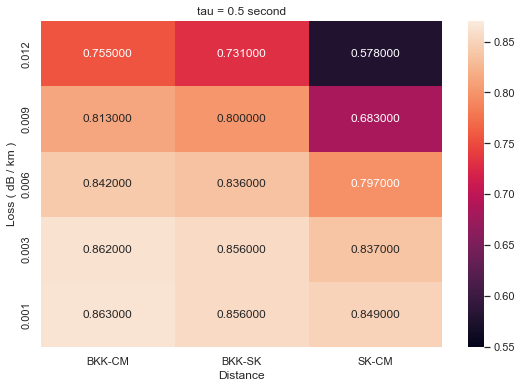

In [16]:
# tau=.0.5
heatmap = np.array([[f_BKK_CM_12_tau05, f_BKK_SK_12_tau05, f_SK_CM_12_tau05], 
            [f_BKK_CM_9_tau05, f_BKK_SK_9_tau05, f_SK_CM_9_tau05], 
            [f_BKK_CM_6_tau05, f_BKK_SK_6_tau05, f_SK_CM_6_tau05],
            [f_BKK_CM_3_tau05, f_BKK_SK_3_tau05, f_SK_CM_3_tau05],
            [f_BKK_CM_1_tau05, f_BKK_SK_1_tau05, f_SK_CM_1_tau05],
            ])
loss = ["0.012", "0.009", "0.006", "0.003", "0.001"]
place = ["BKK-CM", "BKK-SK", "SK-CM"]

seaborn.set_theme()
f, ax = plt.subplots(figsize=(9, 6))
ax = seaborn.heatmap(heatmap, xticklabels=place, yticklabels=loss, fmt='f', annot=True, vmin=0.55, vmax=0.87)
plt.title('tau = 0.5 second')
plt.xlabel('Distance')
plt.ylabel('Loss ( dB / km )')

Text(57.5, 0.5, 'Loss ( dB / km )')

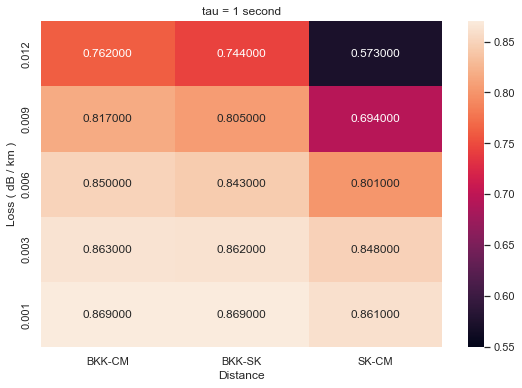

In [17]:
# tau=1
heatmap = np.array([[f_BKK_CM_12_tau1, f_BKK_SK_12_tau1, f_SK_CM_12_tau1], 
            [f_BKK_CM_9_tau1, f_BKK_SK_9_tau1, f_SK_CM_9_tau1], 
            [f_BKK_CM_6_tau1, f_BKK_SK_6_tau1, f_SK_CM_6_tau1],
            [f_BKK_CM_3_tau1, f_BKK_SK_3_tau1, f_SK_CM_3_tau1],
            [f_BKK_CM_1_tau1, f_BKK_SK_1_tau1, f_SK_CM_1_tau1],
            ])
loss = ["0.012", "0.009", "0.006", "0.003", "0.001"]
place = ["BKK-CM", "BKK-SK", "SK-CM"]

seaborn.set_theme()
f, ax = plt.subplots(figsize=(9, 6))
ax = seaborn.heatmap(heatmap, xticklabels=place, yticklabels=loss, fmt='f', annot=True, vmin=0.55, vmax=0.87)
plt.title('tau = 1 second')
plt.xlabel('Distance')
plt.ylabel('Loss ( dB / km )')

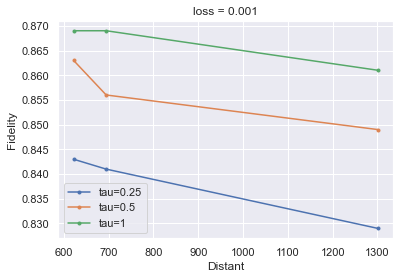

In [9]:
distant = [distance(13.4553, 18.894982, 100.31316, 98.954428), # BKK-CM 
            distance(13.4553, 7.213724, 100.31316, 100.594990), # BKK-SK
            distance(7.213724, 18.804982, 100.594990, 98.954428) ]# SK-CM
# loss = 0.001
plt.plot(distant, [f_BKK_CM_1_tau25, f_BKK_SK_1_tau25, f_SK_CM_1_tau25], '.-', label='tau=0.25')
plt.plot(distant, [f_BKK_CM_1_tau05, f_BKK_SK_1_tau05, f_SK_CM_1_tau05], '.-', label='tau=0.5')
plt.plot(distant, [f_BKK_CM_1_tau1, f_BKK_SK_1_tau1, f_SK_CM_1_tau1], '.-', label='tau=1')
plt.xlabel('Distant')
plt.ylabel('Fidelity')
plt.title('loss = 0.001')
plt.legend()
plt.show()

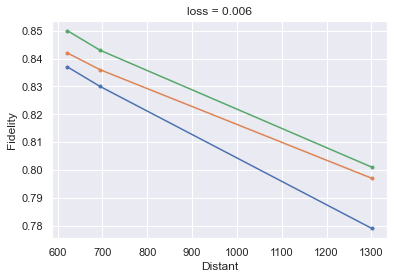

In [10]:
distant = [distance(13.4553, 18.894982, 100.31316, 98.954428), # BKK-CM 
            distance(13.4553, 7.213724, 100.31316, 100.594990), # BKK-SK
            distance(7.213724, 18.804982, 100.594990, 98.954428) ]# SK-CM
# loss = 0.001
plt.plot(distant, [f_BKK_CM_6_tau25, f_BKK_SK_6_tau25, f_SK_CM_6_tau25], '.-', label='tau=0.25')
plt.plot(distant, [f_BKK_CM_6_tau05, f_BKK_SK_6_tau05, f_SK_CM_6_tau05], '.-', label='tau=0.5')
plt.plot(distant, [f_BKK_CM_6_tau1, f_BKK_SK_6_tau1, f_SK_CM_6_tau1], '.-', label='tau=1')
plt.xlabel('Distant')
plt.ylabel('Fidelity')
plt.title('loss = 0.006')
plt.show()

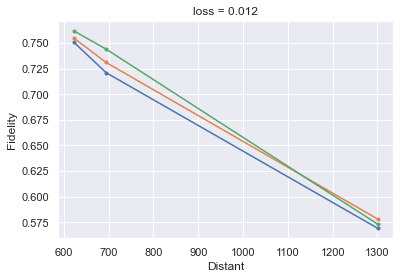

In [11]:
distant = [distance(13.4553, 18.894982, 100.31316, 98.954428), # BKK-CM 
            distance(13.4553, 7.213724, 100.31316, 100.594990), # BKK-SK
            distance(7.213724, 18.804982, 100.594990, 98.954428) ]# SK-CM
# loss = 0.001
plt.plot(distant, [f_BKK_CM_12_tau25, f_BKK_SK_12_tau25, f_SK_CM_12_tau25], '.-', label='tau=0.25')
plt.plot(distant, [f_BKK_CM_12_tau05, f_BKK_SK_12_tau05, f_SK_CM_12_tau05], '.-', label='tau=0.5')
plt.plot(distant, [f_BKK_CM_12_tau1, f_BKK_SK_12_tau1, f_SK_CM_12_tau1], '.-', label='tau=1')
plt.xlabel('Distant')
plt.ylabel('Fidelity')
plt.title('loss = 0.012')
plt.show()

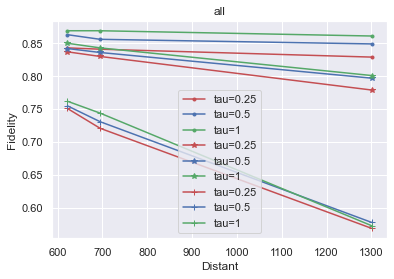

In [12]:
distant = [distance(13.4553, 18.894982, 100.31316, 98.954428), # BKK-CM 
            distance(13.4553, 7.213724, 100.31316, 100.594990), # BKK-SK
            distance(7.213724, 18.804982, 100.594990, 98.954428) ] # SK-CM

# loss = 0.001
plt.plot(distant, [f_BKK_CM_1_tau25, f_BKK_SK_1_tau25, f_SK_CM_1_tau25], 'r.-', label='tau=0.25')
plt.plot(distant, [f_BKK_CM_1_tau05, f_BKK_SK_1_tau05, f_SK_CM_1_tau05], 'b.-', label='tau=0.5')
plt.plot(distant, [f_BKK_CM_1_tau1, f_BKK_SK_1_tau1, f_SK_CM_1_tau1], 'g.-', label='tau=1')

# loss = 0.003
plt.plot(distant, [f_BKK_CM_6_tau25, f_BKK_SK_6_tau25, f_SK_CM_6_tau25], 'r*-', label='tau=0.25')
plt.plot(distant, [f_BKK_CM_6_tau05, f_BKK_SK_6_tau05, f_SK_CM_6_tau05], 'b*-', label='tau=0.5')
plt.plot(distant, [f_BKK_CM_6_tau1, f_BKK_SK_6_tau1, f_SK_CM_6_tau1], 'g*-', label='tau=1')

# loss = 0.012
plt.plot(distant, [f_BKK_CM_12_tau25, f_BKK_SK_12_tau25, f_SK_CM_12_tau25], 'r+-', label='tau=0.25')
plt.plot(distant, [f_BKK_CM_12_tau05, f_BKK_SK_12_tau05, f_SK_CM_12_tau05], 'b+-', label='tau=0.5')
plt.plot(distant, [f_BKK_CM_12_tau1, f_BKK_SK_12_tau1, f_SK_CM_12_tau1], 'g+-', label='tau=1')

plt.xlabel('Distant')
plt.ylabel('Fidelity')
plt.title('all')
plt.legend()
plt.show()

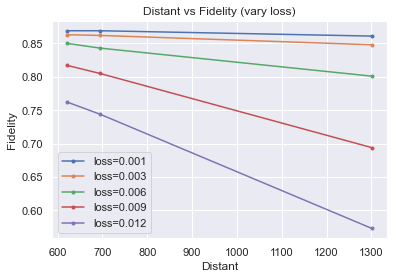

In [13]:
distant = [distance(13.4553, 18.894982, 100.31316, 98.954428), # BKK-CM 
            distance(13.4553, 7.213724, 100.31316, 100.594990), # BKK-SK
            distance(7.213724, 18.804982, 100.594990, 98.954428) ] # SK-CM
plt.plot(distant, [f_BKK_CM_1_tau1, f_BKK_SK_1_tau1, f_SK_CM_1_tau1], '.-', label='loss=0.001')
plt.plot(distant, [f_BKK_CM_3_tau1, f_BKK_SK_3_tau1, f_SK_CM_3_tau1], '.-', label='loss=0.003')
plt.plot(distant, [f_BKK_CM_6_tau1, f_BKK_SK_6_tau1, f_SK_CM_6_tau1], '.-', label='loss=0.006')
plt.plot(distant, [f_BKK_CM_9_tau1, f_BKK_SK_9_tau1, f_SK_CM_9_tau1], '.-', label='loss=0.009')
plt.plot(distant, [f_BKK_CM_12_tau1, f_BKK_SK_12_tau1, f_SK_CM_12_tau1], '.-', label='loss=0.012')
plt.xlabel('Distant')
plt.ylabel('Fidelity')
plt.title('Distant vs Fidelity (vary loss)')
plt.legend()
plt.show()

Measurement error = 0.01

In [14]:
# tau=1
f_BKK_CM_1_mea1_tau1 = plot_all(openPickle('meaErr_0.01/tau1/BKK_CM_0.001_tau1_meaErr1'), 1000, 9000, 'BKK_CM, loss=0.001 tau=1', plot=False)
f_BKK_CM_3_mea1_tau1 = plot_all(openPickle('meaErr_0.01/tau1/BKK_CM_0.003_tau1_meaErr1'), 1000, 9000, 'BKK_CM, loss=0.003 tau=1', plot=False)

f_BKK_SK_1_mea1_tau1 = plot_all(openPickle('meaErr_0.01/tau1/BKK_SK_0.001_tau1_meaErr1'), 1000, 9000, 'BKK_CM, loss=0.006 tau=1', plot=False)
f_BKK_SK_3_mea1_tau1 = plot_all(openPickle('meaErr_0.01/tau1/BKK_SK_0.003_tau1_meaErr1'), 1000, 9000, 'BKK_CM, loss=0.009 tau=1', plot=False)

f_SK_CM_1_mea1_tau1 = plot_all(openPickle('meaErr_0.01/tau1/SK_CM_0.001_tau1_meaErr1'), 1000, 9000, 'BKK_CM, loss=0.012 tau=1', plot=False)
f_SK_CM_3_mea1_tau1 = plot_all(openPickle('meaErr_0.01/tau1/SK_CM_0.003_tau1_meaErr1'), 1000, 9000, 'BKK_CM, loss=0.012 tau=1', plot=False)

# tau=0.25
f_BKK_CM_1_mea1_tau25 = plot_all(openPickle('meaErr_0.01/tau25/BKK_CM_0.001_tau0.25_meaErr1'), 1000, 9000, 'BKK_CM, loss=0.012 tau=1', plot=False)
f_BKK_SK_1_mea1_tau25 = plot_all(openPickle('meaErr_0.01/tau25/BKK_SK_0.001_tau0.25_meaErr1'), 1000, 9000, 'BKK_SK, loss=0.012 tau=1', plot=False)
f_SK_CM_1_mea1_tau25 = plot_all(openPickle('meaErr_0.01/tau25/SK_CM_0.001_tau0.25_meaErr1'), 1000, 9000, 'SK_CM, loss=0.012 tau=1', plot=False)

9000 DFE 0.927
9000 DFE 0.92
9000 DFE 0.925
9000 DFE 0.916
9000 DFE 0.921
9000 DFE 0.906
9000 DFE 0.9
9000 DFE 0.893
9000 DFE 0.882


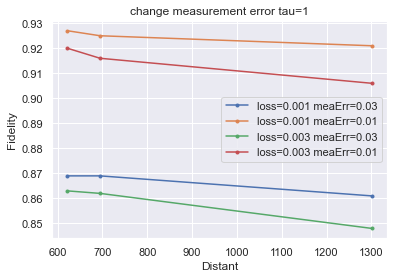

In [15]:
# Fixed tau=1

distant = [distance(13.4553, 18.894982, 100.31316, 98.954428), # BKK-CM 
            distance(13.4553, 7.213724, 100.31316, 100.594990), # BKK-SK
            distance(7.213724, 18.804982, 100.594990, 98.954428) ] # SK-CM

plt.plot(distant, [f_BKK_CM_1_tau1, f_BKK_SK_1_tau1, f_SK_CM_1_tau1], '.-', label='loss=0.001 meaErr=0.03')
plt.plot(distant, [f_BKK_CM_1_mea1_tau1, f_BKK_SK_1_mea1_tau1, f_SK_CM_1_mea1_tau1], '.-', label='loss=0.001 meaErr=0.01')

plt.plot(distant, [f_BKK_CM_3_tau1, f_BKK_SK_3_tau1, f_SK_CM_3_tau1], '.-', label='loss=0.003 meaErr=0.03')
plt.plot(distant, [f_BKK_CM_3_mea1_tau1, f_BKK_SK_3_mea1_tau1, f_SK_CM_3_mea1_tau1], '.-', label='loss=0.003 meaErr=0.01')

plt.xlabel('Distant')
plt.ylabel('Fidelity')
plt.title('change measurement error tau=1')
plt.legend()
plt.show()

9000 DFE 0.904
9000 DFE 0.902
9000 DFE 0.881
9000 DFE 0.887
9000 DFE 0.881
9000 DFE 0.832


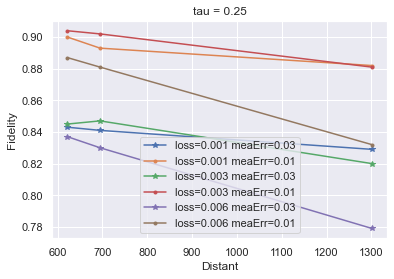

In [16]:
# Fixed tau=0.25 look at measurement error

f_BKK_CM_3_mea1_tau25 = plot_all(openPickle('meaErr_0.01/tau25/BKK_CM_0.003_tau0.25_meaErr1'), 1000, 9000, 'BKK_CM, loss=0.003 tau=0.25', plot=False)
f_BKK_SK_3_mea1_tau25 = plot_all(openPickle('meaErr_0.01/tau25/BKK_SK_0.003_tau0.25_meaErr1'), 1000, 9000, 'BKK_CM, loss=0.003 tau=0.25', plot=False)
f_SK_CM_3_mea1_tau25 = plot_all(openPickle('meaErr_0.01/tau25/SK_CM_0.003_tau0.25_meaErr1'), 1000, 9000, 'BKK_CM, loss=0.003 tau=0.25', plot=False)

f_BKK_CM_6_mea1_tau25 = plot_all(openPickle('meaErr_0.01/tau25/BKK_CM_0.006_tau0.25_meaErr1'), 1000, 9000, 'BKK_CM, loss=0.006 tau=0.25', plot=False)
f_BKK_SK_6_mea1_tau25 = plot_all(openPickle('meaErr_0.01/tau25/BKK_SK_0.006_tau0.25_meaErr1'), 1000, 9000, 'BKK_CM, loss=0.006 tau=0.25', plot=False)
f_SK_CM_6_mea1_tau25 = plot_all(openPickle('meaErr_0.01/tau25/SK_CM_0.006_tau0.25_meaErr1'), 1000, 9000, 'BKK_CM, loss=0.006 tau=0.25', plot=False)

distant = [distance(13.4553, 18.894982, 100.31316, 98.954428), # BKK-CM 
            distance(13.4553, 7.213724, 100.31316, 100.594990), # BKK-SK
            distance(7.213724, 18.804982, 100.594990, 98.954428) ] # SK-CM

# loss 1
plt.plot(distant, [f_BKK_CM_1_tau25, f_BKK_SK_1_tau25, f_SK_CM_1_tau25], '*-', label='loss=0.001 meaErr=0.03')
plt.plot(distant, [f_BKK_CM_1_mea1_tau25, f_BKK_SK_1_mea1_tau25, f_SK_CM_1_mea1_tau25], '.-', label='loss=0.001 meaErr=0.01')

# loss 3
plt.plot(distant, [f_BKK_CM_3_tau25, f_BKK_SK_3_tau25, f_SK_CM_3_tau25], '*-', label='loss=0.003 meaErr=0.03')
plt.plot(distant, [f_BKK_CM_3_mea1_tau25, f_BKK_SK_3_mea1_tau25, f_SK_CM_3_mea1_tau25], '.-', label='loss=0.003 meaErr=0.01')

# loss 6
plt.plot(distant, [f_BKK_CM_6_tau25, f_BKK_SK_6_tau25, f_SK_CM_6_tau25], '*-', label='loss=0.006 meaErr=0.03')
plt.plot(distant, [f_BKK_CM_6_mea1_tau25, f_BKK_SK_6_mea1_tau25, f_SK_CM_6_mea1_tau25], '.-', label='loss=0.006 meaErr=0.01')

plt.xlabel('Distant')
plt.ylabel('Fidelity')
plt.title('tau = 0.25')
plt.legend()
plt.show()

# Effect of measrement error impact more than loss

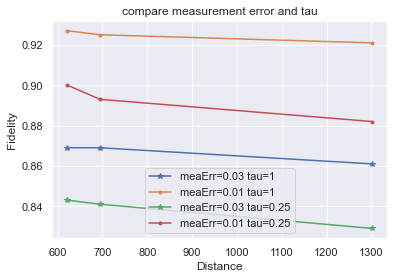

In [17]:
# fixed loss = 0.001

# tau = 1
plt.plot(distant, [f_BKK_CM_1_tau1, f_BKK_SK_1_tau1, f_SK_CM_1_tau1], '*-', label='meaErr=0.03 tau=1')
plt.plot(distant, [f_BKK_CM_1_mea1_tau1, f_BKK_SK_1_mea1_tau1, f_SK_CM_1_mea1_tau1], '.-', label='meaErr=0.01 tau=1')

# tau = 0.25
plt.plot(distant, [f_BKK_CM_1_tau25, f_BKK_SK_1_tau25, f_SK_CM_1_tau25], '*-', label='meaErr=0.03 tau=0.25')
plt.plot(distant, [f_BKK_CM_1_mea1_tau25, f_BKK_SK_1_mea1_tau25, f_SK_CM_1_mea1_tau25], '.-', label='meaErr=0.01 tau=0.25')

plt.title('compare measurement error and tau')
plt.xlabel('Distance')
plt.ylabel('Fidelity')
plt.legend()
plt.show()

# Tau effect more than measurement error
# look at orange red blue

In [18]:
f_BKK_CM_1_mea1_tau1

0.927